# 11wk-2: 순환신경망 (5)

최규빈  
2022-11-15

> LSTM (1)– GPU실험, abcabC예제, abcdabcD예제

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-wCXvhHTVOdOLBFD5T5uscl>

# import

In [175]:
import torch
import matplotlib.pyplot as plt
import time

# Define some funtions

In [2]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# GPU 실험

## 20000 len + 20 hidden nodes

***cpu***

In [3]:
x = torch.randn([20000,4]) 
y = torch.randn([20000,4]) 

In [5]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [6]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [9]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [10]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [11]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

-   왜 빠른지?

## 20000 len + 20 hidden nodes + 역전파주석처리

***cpu***

In [31]:
x = torch.randn([20000,4]) 
y = torch.randn([20000,4]) 

In [32]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [33]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [34]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [35]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [36]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

## 2000 len + 20 hidden nodes

***cpu***

In [37]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [38]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [39]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [40]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [41]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [42]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

## 2000 len + 20 hidden nodes + 역전파주석처리

***cpu***

In [67]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [68]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [69]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [70]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [71]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [72]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

## 2000 len + 5000 hidden nodes

***cpu***

In [80]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [81]:
rnn = torch.nn.RNN(4,1000) 
linr = torch.nn.Linear(1000,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [83]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [84]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [85]:
rnn = torch.nn.RNN(4,1000).to("cuda:0")
linr = torch.nn.Linear(1000,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [86]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

## 2000 len + 5000 hidden nodes + 역전파주석처리

***cpu***

In [91]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [92]:
rnn = torch.nn.RNN(4,1000) 
linr = torch.nn.Linear(1000,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [93]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

***gpu***

In [94]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [95]:
rnn = torch.nn.RNN(4,1000).to("cuda:0")
linr = torch.nn.Linear(1000,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [96]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

## 실험결과 요약

|  len  | \# of hidden nodes | backward |  cpu  | gpu  | ratio |
|:-----:|:------------------:|:--------:|:-----:|:----:|:-----:|
| 20000 |         20         |    O     | 93.02 | 3.26 | 28.53 |
| 20000 |         20         |    X     | 18.85 | 1.29 | 14.61 |
| 2000  |         20         |    O     | 6.53  | 0.75 | 8.70  |
| 2000  |         20         |    X     | 1.25  | 0.14 | 8.93  |
| 2000  |        1000        |    O     | 58.99 | 4.75 | 12.41 |
| 2000  |        1000        |    X     | 13.16 | 2.29 | 5.74  |

# Exam5: abcabC

## data

In [160]:
txt = list('abcabC')*100
txt[:8]

In [161]:
txt_x = txt[:-1] 
txt_y = txt[1:]

In [162]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [163]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

In [164]:
x.shape

## RNN

In [110]:
torch.manual_seed(43052) 
rnn = torch.nn.RNN(4,3) 
linr = torch.nn.Linear(3,4) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+ list(linr.parameters()))

In [111]:
rnn.to("cuda:0") 
linr.to("cuda:0")

`-` 3000 epochs

In [112]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [116]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

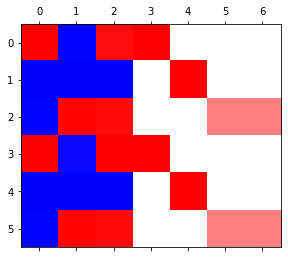

In [118]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 6000 epochs

In [119]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [120]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

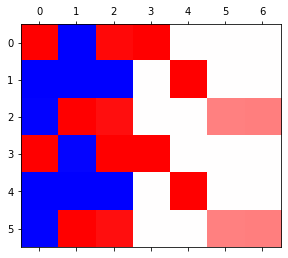

In [121]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 9000 epochs

In [122]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [123]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

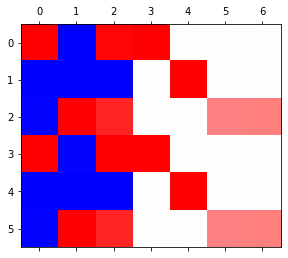

In [124]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 12000 epochs

In [125]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [126]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

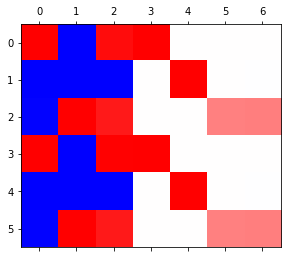

In [127]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 15000 epochs

In [128]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [129]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

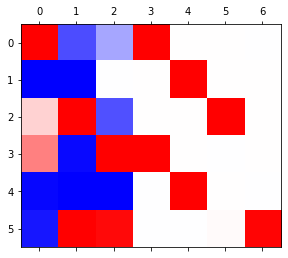

In [132]:
plt.matshow(combinded[-6:],cmap='bwr')

## LSTM

`-` LSTM

In [133]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,3) 
linr = torch.nn.Linear(3,4) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+ list(linr.parameters()))

In [134]:
lstm.to("cuda:0") 
linr.to("cuda:0")

`-` 3000 epochs

In [136]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [139]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

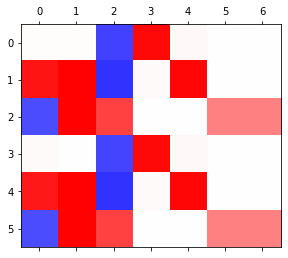

In [141]:
plt.matshow(combinded[-6:],cmap='bwr',vmin=-1,vmax=1)

`-` 6000 epochs

In [142]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [143]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

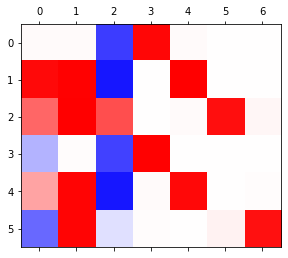

In [144]:
plt.matshow(combinded[-6:],cmap='bwr',vmin=-1,vmax=1)

## RNN vs LSTM 성능비교실험

`-` RNN

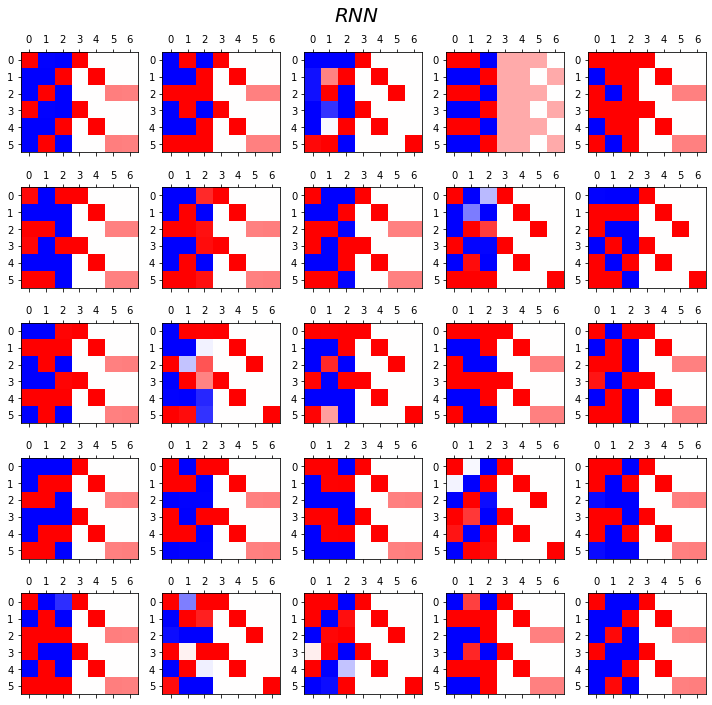

In [167]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,3).to("cuda:0")
        linr = torch.nn.Linear(3,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,3).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

`-` LSTM

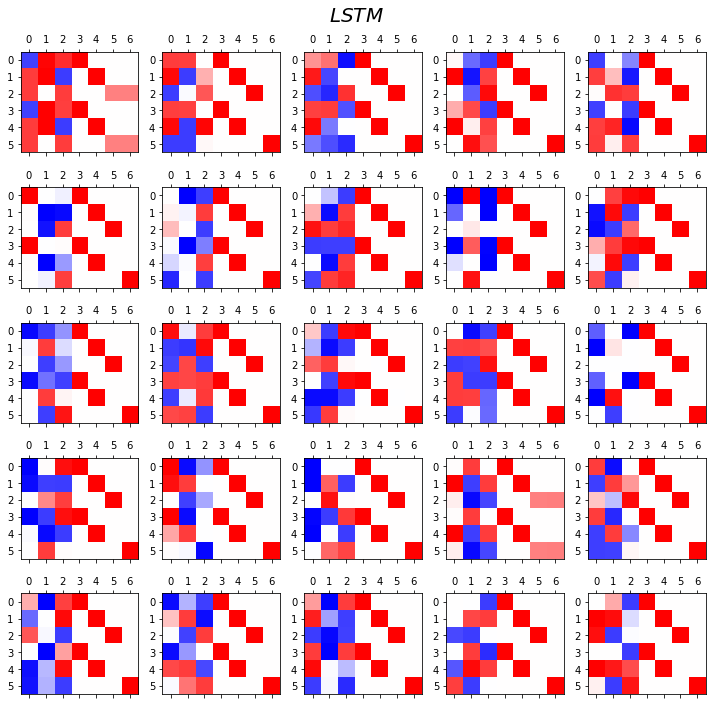

In [168]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,3).to("cuda:0")
        linr = torch.nn.Linear(3,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,3).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

# Exam6: abcdabcD

## data

In [169]:
txt = list('abcdabcD')*100
txt[:8]

In [170]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [171]:
mapping = {'a':0, 'b':1, 'c':2, 'd':3, 'D':4}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [172]:
x=x.to("cuda:0")
y=y.to("cuda:0")

## RNN vs LSTM 성능비교실험

`-` RNN

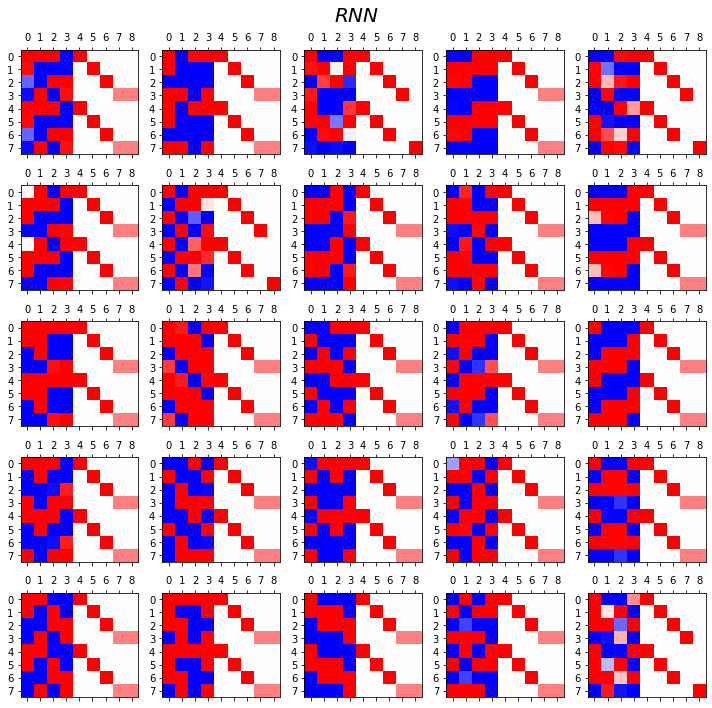

In [173]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(5,4).to("cuda:0")
        linr = torch.nn.Linear(4,5).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,4).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

`-` LSTM

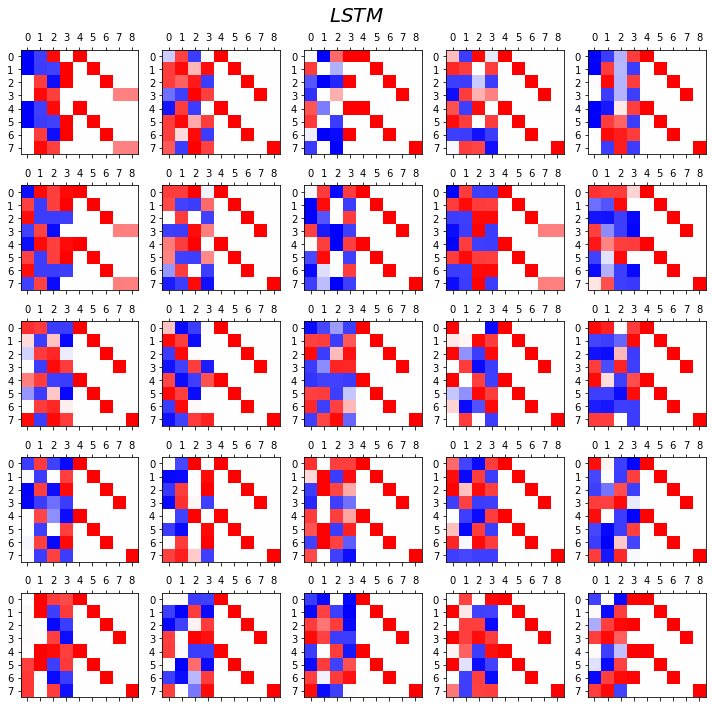

In [174]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(5,4).to("cuda:0")
        linr = torch.nn.Linear(4,5).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,4).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

`-` 관찰1: LSTM이 확실히 장기기억에 강하다.

`-` 관찰2: LSTM은 hidden에 0이 잘 나온다.

-   사실 확실히 구분되는 특징을 판별할때는 -1,1 로 히든레이어 값들이
    설정되면 명확하다.
-   히든레이어에 -1~1사이의 값이 나온다면 애매한 판단이 내려지게 된다.
-   그런데 이 애매한 판단이 어떻게 보면 문맥의 뉘앙스를 이해하는데 더 잘
    맞다.
-   그런데 RNN은 -1,1로 셋팅된 상황에서 -1~1로의 변화가 더디다는 것이
    문제임.